In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D2-Conrad/S4/Office_Conrad-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
len(train_data),len(test_data)

(7920, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),24):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+24, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (329, 24, 1)
y_train.shape =  (329, 24)
X_test.shape =  (29, 24, 1)
y_test.shape =  (29, 24)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(24))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
Total params: 7,800
Trainable params: 7,800
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
3/3 [==============================] - 7s 62ms/step - loss: 87.6603
Epoch 2/300
3/3 [==============================] - 0s 39ms/step - loss: 86.7924
Epoch 3/300
3/3 [==============================] - 0s 48ms/step - loss: 85.9702
Epoch 4/300
3/3 [==============================] - 0s 71ms/step - loss: 85.1347
Epoch 5/300
3/3 [==============================] - 0s 47ms/step - loss: 84.2222
Epoch 6/300
3/3 [==============================] - 0s 59ms/step - loss: 83.2218
Epoch 7/300
3/3 [==============================] - 0s 38ms/step - loss: 82.1126
Epoch 8/300
3/3 [==============================] - 0s 44ms/step - loss: 80.9103
Epoch 9/300
3/3 [==============================] - 0s 39ms/step - loss: 79.6222
Epoch 10/300
3/3 [==============================] - 0s 22ms/step - loss: 78.2460
Epoch 11/300
3/3 [==============================] - 0s 22ms/step - loss: 76.8090
Epoch 12/300
3/3 [==============================] - 0s 21ms/step - loss: 75.3109
Epoch 13/300
3/3 [===================

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 2.0347114914722293
Root Mean Squared Error for Stacked LSTM Model for testing is: 2.0773191434163203
Mean Absolute Error for Stacked LSTM Model for training is: 1.563362438893969
Mean Absolute Error for Stacked LSTM Model for testing is: 1.6459216742431195
MAPE for Stacked Model for training is: 0.17616688691259882
MAPE for Stacked Model for testing is: 0.22202761199091736


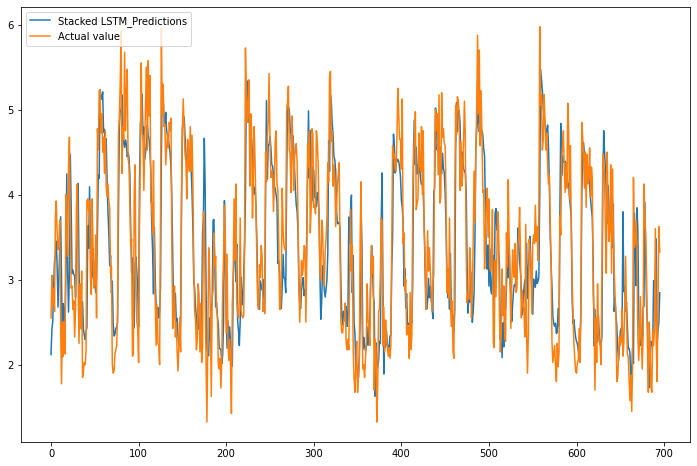

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([2.54999995]), array([2.1173217], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.43267822]), array([0.63975143]), array([0.18671417]), array([-0.01492024]), array([-0.58779931]), array([0.44625354]), array([0.4720602]), array([0.39555931]), array([0.67226362]), array([0.38599682]), array([0.25748205]), array([-1.2646482]), array([-1.2506789]), array([0.41347122]), array([-0.61727357]), array([-0.13190126]), array([-0.30146217]), array([0.89786935]), array([-0.66812825]), array([0.17302108]), array([1.70688868]), array([1.57506585]), array([-0.77415204]), array([-0.97117496]), array([-0.14702654]), array([-0.4605515]), array([-0.3117888]), array([-0.71930575]), array([-0.14316511]), array([0.64412808]), array([0.22897458]), array([-1.18074799]), array([-0.85554361]), array([0.39035034]), array([-0.32341218]), array([0.6798532]), array([-0.89186823]), array([-0.49269652]), array([-0.32144952]), array([-0.29490447]), array([-0.23261881]), array([1.48278284]), array([0.31818295]), array([0.4320302]), array([-0.16761231]), array([-0.42415428]), array([-0.16780

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.18501306]), array([-1.69800377]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(359, 337)